=== DIABETES PREDICTION MODEL TRAINING ===
Loading and preparing dataset...
--2025-10-15 20:26:15--  https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23278 (23K) [text/plain]
Saving to: ‘diabetes.csv’

diabetes.csv        100%[===================>]  22.73K  --.-KB/s    in 0.002s  

2025-10-15 20:26:15 (14.3 MB/s) - ‘diabetes.csv’ saved [23278/23278]

✅ Dataset loaded successfully!
📊 Dataset shape: (768, 9)

=== DATA EXPLORATION ===
First 5 rows of dataset:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2

/tmp/ipython-input-3009582171.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Outcome', data=df, palette='viridis')
/tmp/ipython-input-3009582171.py:77: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean[feature].fillna(median_val, inplace=True)


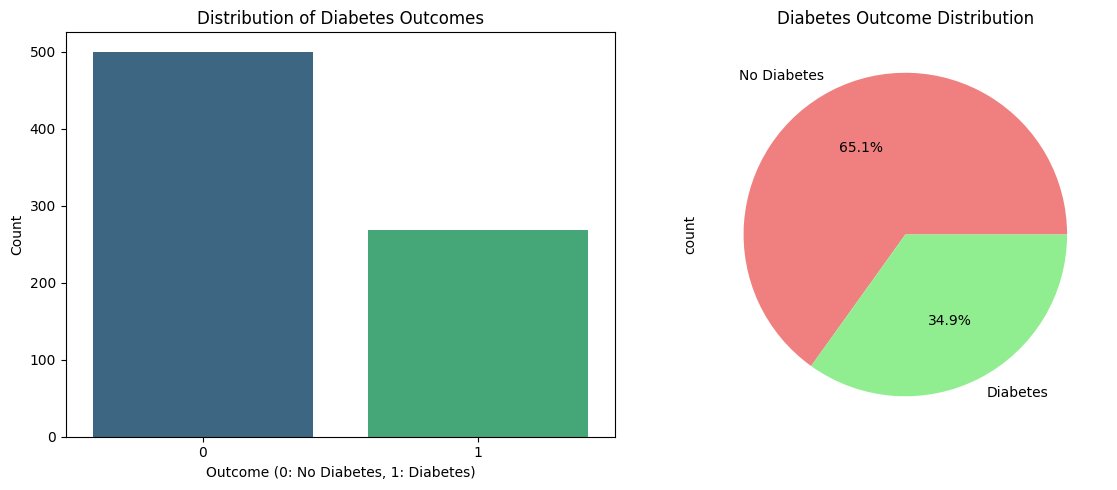


🎯 Features shape: (768, 8)
🎯 Target shape: (768,)
Features used: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

📊 Data split completed:
Training set: 614 samples
Test set: 154 samples
Diabetes percentage in training: 34.85%

=== MODEL TRAINING ===
🌲 Training Random Forest Classifier...
📈 Training Logistic Regression...

=== MODEL COMPARISON ===
🌲 Random Forest Accuracy: 0.7792 (77.92%)
📈 Logistic Regression Accuracy: 0.7013 (70.13%)
🎉 Best model: Random Forest

=== DETAILED MODEL PERFORMANCE ===
🌲 Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.88      0.84       100
           1       0.73      0.59      0.65        54

    accuracy                           0.78       154
   macro avg       0.76      0.74      0.75       154
weighted avg       0.77      0.78      0.77       154

📈 Logistic Regression Classification Report:
              preci

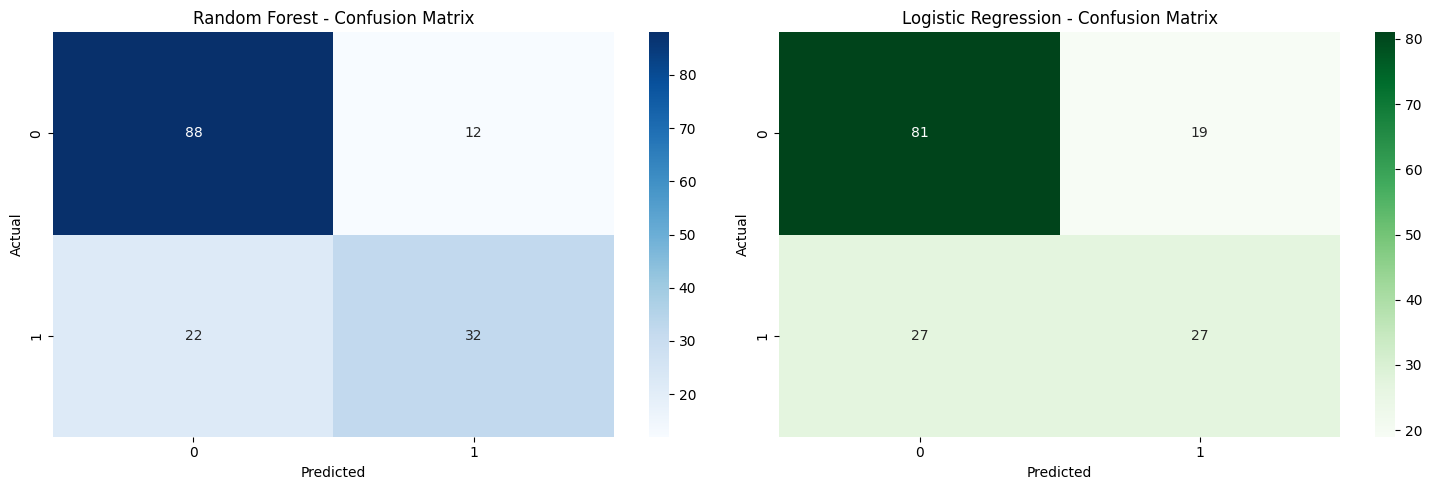


=== FEATURE IMPORTANCE ===
Top 5 most important features:
                    feature  importance
1                   Glucose    0.274086
5                       BMI    0.161903
6  DiabetesPedigreeFunction    0.125020
7                       Age    0.112985
4                   Insulin    0.091224


/tmp/ipython-input-3009582171.py:182: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importance, x='importance', y='feature', palette='rocket')


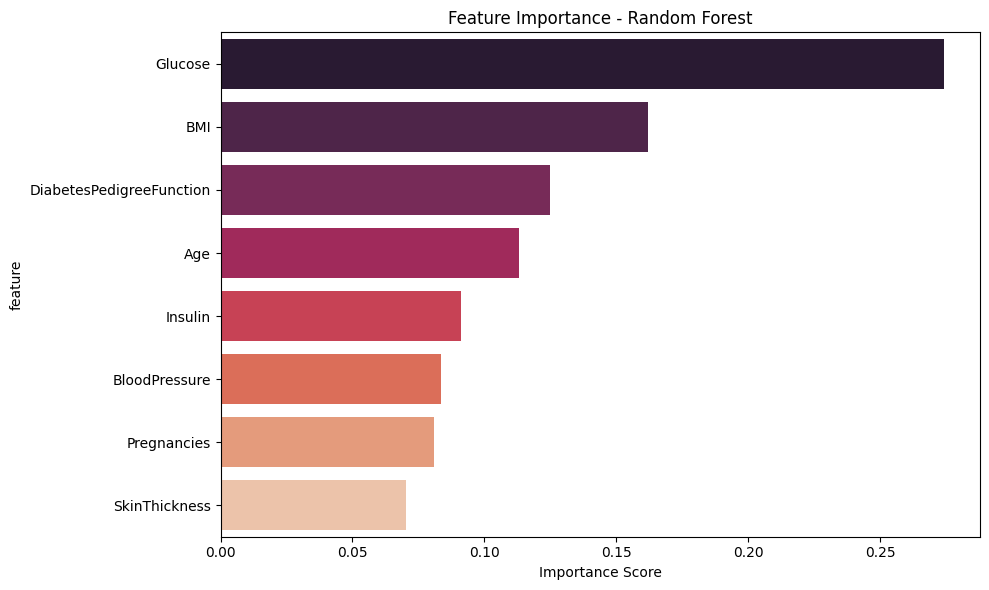


=== SAVING MODEL AND FILES ===
✅ All files saved successfully!
📁 Saved files:
   - diabetes_model.pkl (main model)
   - diabetes_model.joblib (backup model)
   - diabetes_cleaned.csv (cleaned dataset)
   - feature_names.pkl (feature names)
   - model_metrics.pkl (model performance metrics)

=== DOWNLOADING FILES ===


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

📥 All files downloaded! You can now proceed to Streamlit app development.
🎉 Model training completed successfully!


In [1]:
# === COMPLETE DIABETES PREDICTION MODEL TRAINING CODE FOR GOOGLE COLAB ===

# Install required packages in Colab
!pip install pandas numpy scikit-learn matplotlib seaborn plotly joblib

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pickle
import joblib

print("=== DIABETES PREDICTION MODEL TRAINING ===")
print("Loading and preparing dataset...")

# Download the dataset
!wget -O diabetes.csv https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv

# Load the dataset
column_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
                'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
df = pd.read_csv('diabetes.csv', names=column_names)
print("✅ Dataset loaded successfully!")
print(f"📊 Dataset shape: {df.shape}")

print("\n=== DATA EXPLORATION ===")
print("First 5 rows of dataset:")
print(df.head())

print("\n📋 Dataset information:")
print(df.info())

print("\n📈 Basic statistics:")
print(df.describe())

# Check for missing values (represented as zeros in medical data)
print("\n🔍 Missing values analysis (zeros in medical data):")
zero_counts = (df == 0).sum()
print(zero_counts)

# Check target variable distribution
print("\n🎯 Diabetes Outcome Distribution:")
outcome_counts = df['Outcome'].value_counts().sort_index()
print(outcome_counts)

# Visualize outcome distribution
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.countplot(x='Outcome', data=df, palette='viridis')
plt.title('Distribution of Diabetes Outcomes')
plt.xlabel('Outcome (0: No Diabetes, 1: Diabetes)')
plt.ylabel('Count')

print("\n=== DATA PREPROCESSING ===")
# Handle missing values (zeros in medical features)
print("🔄 Handling missing values (zeros in medical data)...")

# Create a copy for cleaning
df_clean = df.copy()

# Replace zeros with NaN for medical features (except Pregnancies and Outcome)
medical_features = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for feature in medical_features:
    zero_count_before = (df_clean[feature] == 0).sum()
    df_clean[feature] = df_clean[feature].replace(0, np.nan)
    zero_count_after = (df_clean[feature] == 0).sum()
    print(f"{feature}: {zero_count_before} zeros → {zero_count_after} zeros")

# Fill missing values with median
for feature in medical_features:
    median_val = df_clean[feature].median()
    df_clean[feature].fillna(median_val, inplace=True)
    print(f"{feature}: filled with median {median_val:.2f}")

print("✅ Data cleaning completed!")

print("\n🎯 Diabetes Outcome Distribution after cleaning:")
outcome_counts_clean = df_clean['Outcome'].value_counts().sort_index()
print(outcome_counts_clean)
print(f"Diabetes percentage: {df_clean['Outcome'].mean():.2%}")

plt.subplot(1, 2, 2)
df_clean['Outcome'].value_counts().plot(kind='pie', autopct='%1.1f%%',
                                      colors=['lightcoral', 'lightgreen'],
                                      labels=['No Diabetes', 'Diabetes'])
plt.title('Diabetes Outcome Distribution')

plt.tight_layout()
plt.show()

# Prepare features and target
X = df_clean.drop('Outcome', axis=1)
y = df_clean['Outcome']

print(f"\n🎯 Features shape: {X.shape}")
print(f"🎯 Target shape: {y.shape}")
print("Features used:", list(X.columns))

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\n📊 Data split completed:")
print(f"Training set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")
print(f"Diabetes percentage in training: {y_train.mean():.2%}")

print("\n=== MODEL TRAINING ===")
# Model 1: Random Forest
print("🌲 Training Random Forest Classifier...")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)

# Model 2: Logistic Regression
print("📈 Training Logistic Regression...")
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_pred)

print("\n=== MODEL COMPARISON ===")
print(f"🌲 Random Forest Accuracy: {rf_accuracy:.4f} ({rf_accuracy:.2%})")
print(f"📈 Logistic Regression Accuracy: {lr_accuracy:.4f} ({lr_accuracy:.2%})")

# Determine best model
if rf_accuracy >= lr_accuracy:
    best_model = rf_model
    best_model_name = "Random Forest"
    print(f"🎉 Best model: {best_model_name}")
else:
    best_model = lr_model
    best_model_name = "Logistic Regression"
    print(f"🎉 Best model: {best_model_name}")

print("\n=== DETAILED MODEL PERFORMANCE ===")
print("🌲 Random Forest Classification Report:")
print(classification_report(y_test, rf_pred))

print("📈 Logistic Regression Classification Report:")
print(classification_report(y_test, lr_pred))

# Confusion Matrix Visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Random Forest Confusion Matrix
cm_rf = confusion_matrix(y_test, rf_pred)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', ax=ax1)
ax1.set_title('Random Forest - Confusion Matrix')
ax1.set_xlabel('Predicted')
ax1.set_ylabel('Actual')

# Logistic Regression Confusion Matrix
cm_lr = confusion_matrix(y_test, lr_pred)
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Greens', ax=ax2)
ax2.set_title('Logistic Regression - Confusion Matrix')
ax2.set_xlabel('Predicted')
ax2.set_ylabel('Actual')

plt.tight_layout()
plt.show()

# Feature Importance (for Random Forest)
print("\n=== FEATURE IMPORTANCE ===")
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print("Top 5 most important features:")
print(feature_importance.head())

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance, x='importance', y='feature', palette='rocket')
plt.title('Feature Importance - Random Forest')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.show()

print("\n=== SAVING MODEL AND FILES ===")
# Save the best model
with open('diabetes_model.pkl', 'wb') as file:
    pickle.dump(best_model, file)

# Also save using joblib (alternative)
joblib.dump(best_model, 'diabetes_model.joblib')

# Save the cleaned dataset for Streamlit app
df_clean.to_csv('diabetes_cleaned.csv', index=False)

# Save the feature names
feature_names = list(X.columns)
with open('feature_names.pkl', 'wb') as file:
    pickle.dump(feature_names, file)

# Save model metrics
model_metrics = {
    'best_model': best_model_name,
    'accuracy': max(rf_accuracy, lr_accuracy),
    'feature_names': feature_names,
    'model_timestamp': pd.Timestamp.now().strftime('%Y-%m-%d %H:%M:%S')
}

with open('model_metrics.pkl', 'wb') as file:
    pickle.dump(model_metrics, file)

print("✅ All files saved successfully!")
print("📁 Saved files:")
print("   - diabetes_model.pkl (main model)")
print("   - diabetes_model.joblib (backup model)")
print("   - diabetes_cleaned.csv (cleaned dataset)")
print("   - feature_names.pkl (feature names)")
print("   - model_metrics.pkl (model performance metrics)")

print("\n=== DOWNLOADING FILES ===")
from google.colab import files

# Download files to your local machine
files.download('diabetes_model.pkl')
files.download('diabetes_cleaned.csv')
files.download('feature_names.pkl')
files.download('model_metrics.pkl')

print("📥 All files downloaded! You can now proceed to Streamlit app development.")
print("🎉 Model training completed successfully!")